<a href="https://colab.research.google.com/github/LucasMirandaVS/projeto_time_series_analisys_covid/blob/main/Estacionariedade_e_diferencia%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pacotes

In [1]:
!pip install -q statsmodels==0.12.1

     |████████████████████████████████| 9.5 MB 4.6 MB/s 


In [51]:
# Limpeza e dataviz
import numpy as np
import pandas as pd
import datetime as date
import matplotlib.pyplot as plt
import seaborn as sns

# filtrando os avisos do console
import warnings
warnings.filterwarnings('ignore')

# Testes estatísticos
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA

# Importando os dados

In [26]:
url = 'https://github.com/alura-cursos/Alura-COVID2/raw/main/casos-brasil.csv'
df = pd.read_csv(url,index_col=0,parse_dates=[0])

In [27]:
df['data'] = pd.to_datetime(df['data'])
df['data'] = pd.to_datetime(df.data).dt.date
df.tail()

,data,pais,estado,cidade,novosObitos,Obitos,novosCasos,Casos,obitosMS,casosMS,obitos_por_100k,casos_por_100k,obitos_por_casos,recuperados,suspeitos,testes,testes_por_100k
semana,,,,,,,,,,,,,,,,,
31,2020-07-31,Brazil,SC,TOTAL,59,1102,3169,84073,1102,84073,15.38078,1173.41923,0.01311,70601.0,9573.0,282607.0,3944.38747
31,2020-07-31,Brazil,SE,TOTAL,26,1434,1029,58713,1434,58713,62.38319,2554.18724,0.02442,30937.0,6466.0,93587.0,4071.30825
31,2020-07-31,Brazil,SP,TOTAL,287,22997,13298,542304,22997,542304,50.08161,1181.00007,0.04241,351610.0,340112.0,1788225.0,3894.29886
31,2020-07-31,Brazil,TO,TOTAL,9,390,522,25346,381,24824,24.79550,1611.45323,0.01539,15035.0,8367.0,33685.0,2141.63190
31,2020-07-31,Brazil,TOTAL,TOTAL,1267,92728,53264,2670451,92475,2662485,44.12528,1270.75305,0.03472,2008854.0,1079525.0,6988772.0,3325.65673


In [28]:
# Conferindo que a coluna de data é um objeto date
df_sp.index = pd.to_datetime(df_sp.data)
df_mg.index = pd.to_datetime(df_mg.data)
df_rj.index = pd.to_datetime(df_rj.data)
df_es.index = pd.to_datetime(df_es.data)

# Selecionando os dados de interesse

In [29]:
# estados de interesse
df_sp = df[df['estado'] == 'SP']
df_mg = df[df['estado'] == 'MG']
df_rj = df[df['estado'] == 'RJ']
df_es = df[df['estado'] == 'ES']

In [30]:
# selecionando apenas os estados
y = df_sp['Casos']
z = df_mg['Casos']
x = df_rj['Casos']
a = df_es['Casos']

# Teste ADF, ACF e PACF

#### Teste ADF

In [10]:
print('p-valor de São Paulo:',adfuller(y.dropna())[1])

p-valor de São Paulo: 0.9969563888815705


In [12]:
print('p-valor de Minas Gerais:',adfuller(z.dropna())[1])

p-valor de Minas Gerais: 0.8924172587893053


In [14]:
print('p-valor de do Rio de Janeiro:',adfuller(x.dropna())[1])

p-valor do Rio de Janeiro: 1.0


In [15]:
print('p-valor do Esprítio Santo:',adfuller(z.dropna())[1])

p-valor do Esprítio Santo: 0.8924172587893053


#### Verificando a diferenciação dos *estados*

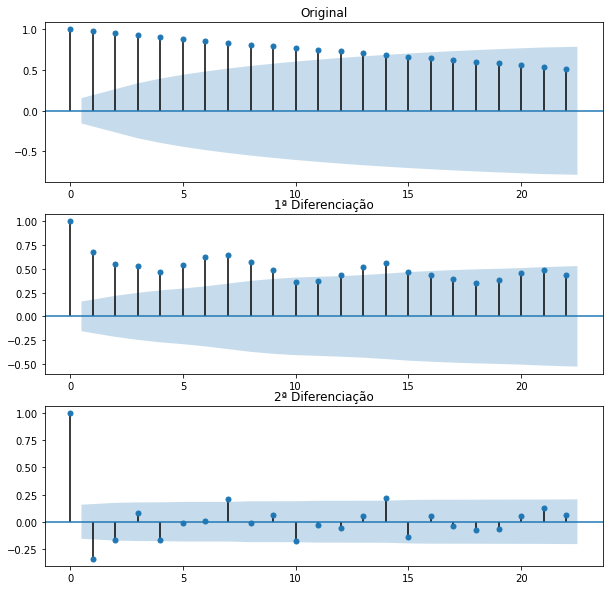

In [17]:
# SP
plotarACF(y,y.diff().dropna(),y.diff().diff().dropna())

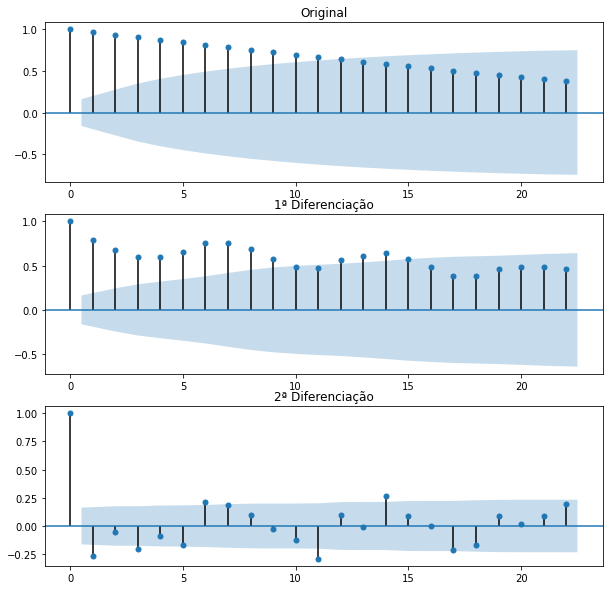

In [18]:
# MG
plotarACF(z,z.diff().dropna(),z.diff().diff().dropna())

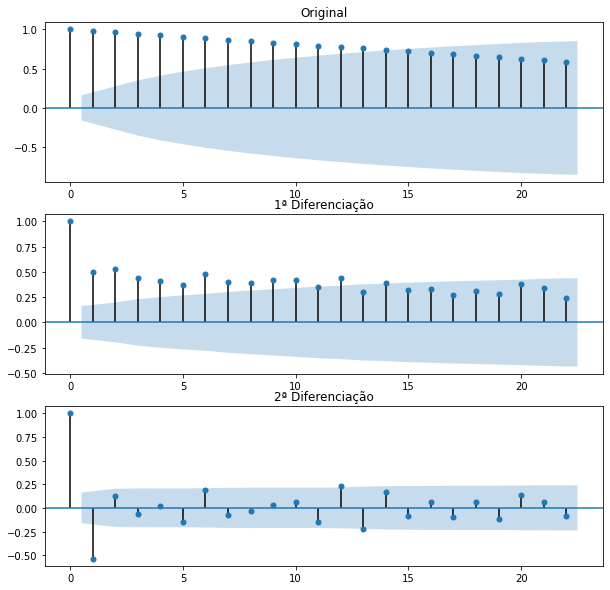

In [19]:
# RJ
plotarACF(x,x.diff().dropna(),x.diff().diff().dropna())

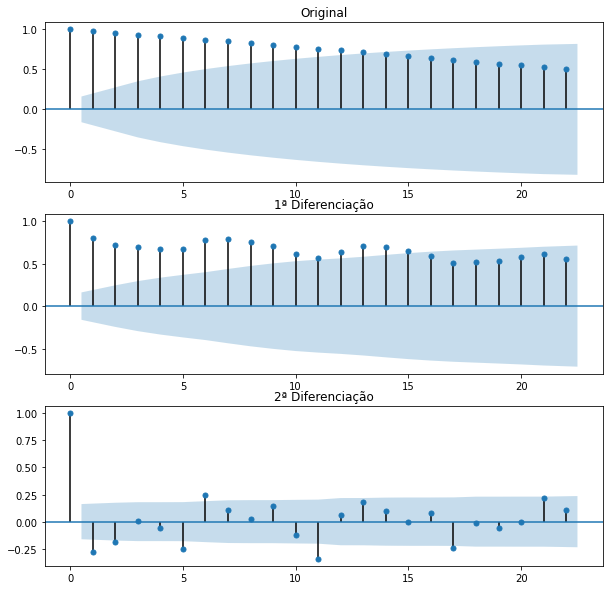

In [20]:
# ES
plotarACF(a,a.diff().dropna(),a.diff().diff().dropna())

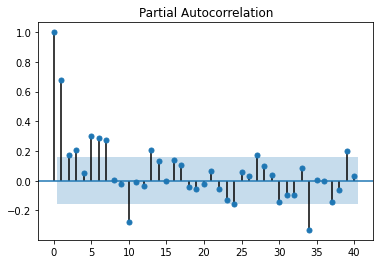

In [33]:
# Verificando se os dados estão diferenciados demais
# SP
plot_pacf(y.diff().dropna(),lags=40); # uma diferenciação

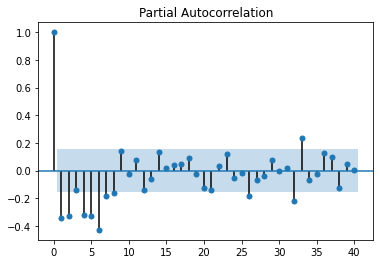

In [34]:
# SP
plot_pacf(y.diff().diff().dropna(),lags=40); # duas diferenciações

Duas é demais.

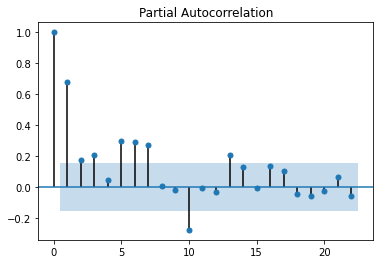

In [43]:
# SP, sem os 40 dias de lag
plot_pacf(y.diff().dropna());

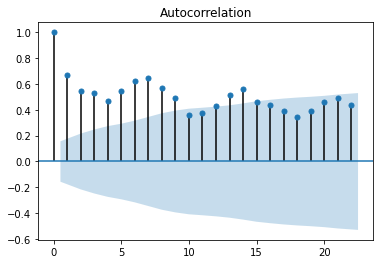

In [47]:
# ACF do SP
plot_acf(y.diff().dropna());

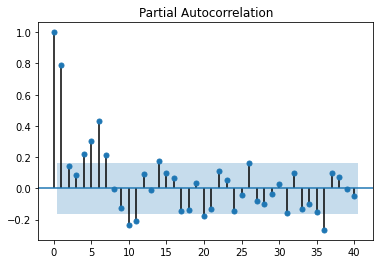

In [35]:
# MG
plot_pacf(z.diff().dropna(),lags=40); # uma diferenciação

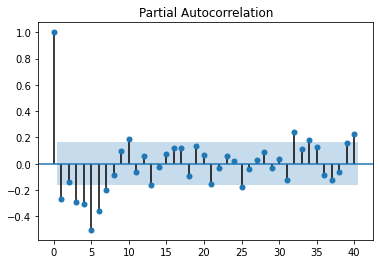

In [36]:
# MG
plot_pacf(z.diff().diff().dropna(),lags=40); # duas diferenciações

Aqui também duas parece ser demais

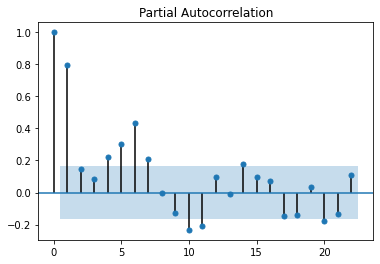

In [44]:
# MG, sem os 40 dias de lag
plot_pacf(z.diff().dropna());

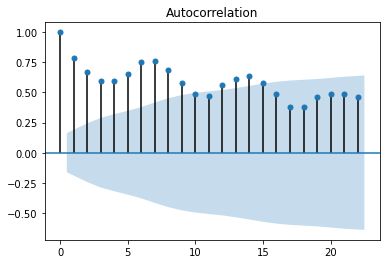

In [48]:
# ACF de MG
plot_acf(z.diff().dropna());

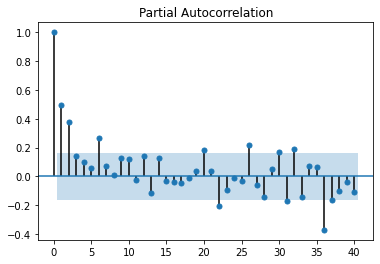

In [38]:
# RJ
plot_pacf(x.diff().dropna(),lags=40); # uma diferenciação

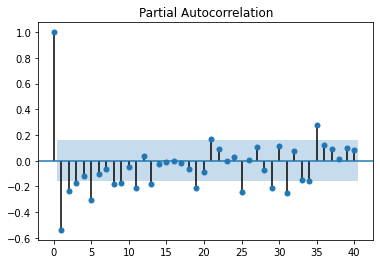

In [39]:
# RJ
plot_pacf(x.diff().diff().dropna(),lags=40); # duas diferenciações

Duas é demais

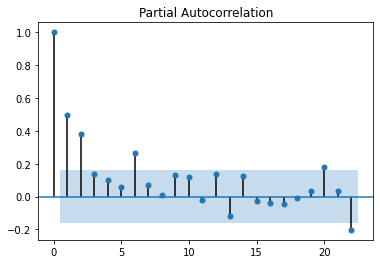

In [45]:
# RJ, sem os 40 dias de lag
plot_pacf(x.diff().dropna());

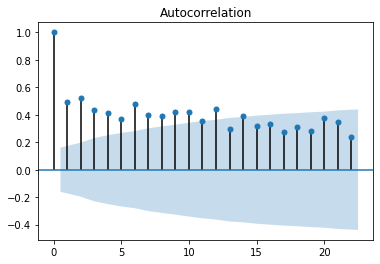

In [49]:
# ACF do RJ
plot_acf(x.diff().dropna());

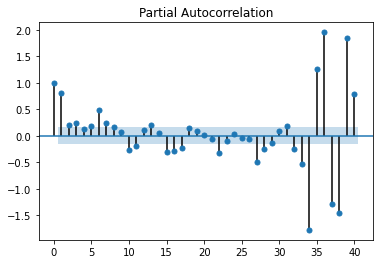

In [40]:
# ES
plot_pacf(a.diff().dropna(),lags=40); # uma diferenciação

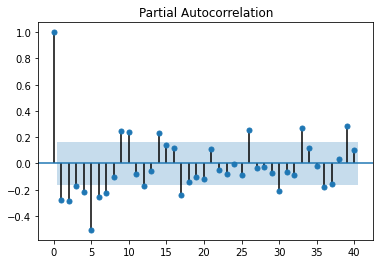

In [42]:
# ES 
plot_pacf(a.diff().diff().dropna(),lags=40); # duas diferenciações

Aqui no entanto parece que duas é melhor que uma

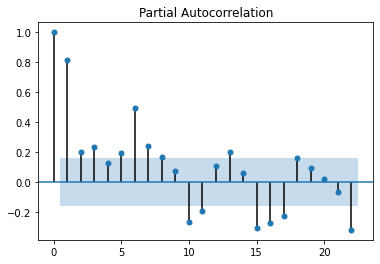

In [46]:
# ES, sem os 40 dias de lag
plot_pacf(a.diff().dropna());

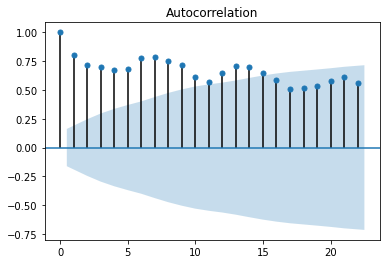

In [50]:
# ACF do ES
plot_acf(a.diff().dropna());